In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
sys.path.append('../scripts')
from scripts.data_analysis import DataOrganize

In [6]:
import glob

files = glob.glob('../data/StockTwits.*_messages.csv')

dfs = []

for file in files:
    df = pd.read_csv(file, nrows=100)
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

In [7]:
data_organize = DataOrganize(data)
data_organize.clean_data()

100%|██████████| 1000/1000 [00:17<00:00, 56.78it/s]
d:\University\researches\fazli\code\crypto_sentiment\Notebooks\..\scripts\data_analysis.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  raw_data['language'], raw_data['entities'] = zip(*[extract_features(str(x)) for x in tqdm(raw_data['body'])])


<class 'str'>


100%|██████████| 659/659 [00:00<00:00, 47881.34it/s]


In [4]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score,confusion_matrix
from scripts.sentiment_analysis_evaluator import Evaluator

filtered_data = data_organize.data[data_organize.data['entities.sentiment.basic'].notna()]

evaluator_vader = Evaluator(model = None,tokenizer = None,data=filtered_data)
accuracy = evaluator_vader.evaluate_vader()
print(f"Accuracy of Vader sentiment analysis on rows with non-NaN entities.sentiment.basic: {accuracy:.2f}")

Vader Sentiment Analysis: 100%|██████████| 391/391 [00:04<00:00, 79.30it/s]

Accuracy of Vader sentiment analysis on rows with non-NaN entities.sentiment.basic: 0.77


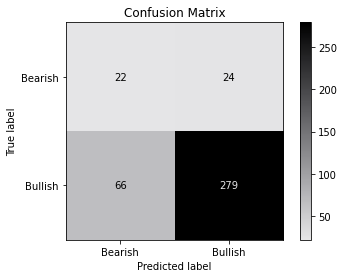

In [8]:
evaluator_vader.show_confusion_matrix()

In [9]:
evaluator_vader.show_bad_samples(num = 10)


Actual Label: Bearish
Predicted Label: Bullish
Text: $XRP.X I’m expecting most alts to run another 2-300% while XRP maintains its price under $1. Tons of other options on the market, but cults will be cults. \n$ETH.X $DOGE.X $SOL.X $TARA.X

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $AVAX.X very strong dump incoming next few days. I smell it!

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X Ada is -48.53% against Bitcoin this year girls. Bitcoin boring boomer coin? 🤣

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $BTC.X  \n \nOk now you place the same 35 grand into a 20 cent stock or crypto and sell at $11 how much is that? \n \n$1,925,000

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $BTC.X  \n \nHere, better example? \n \nDogecoin made 227X \n \nUnder 100B market cap. Over a few weeks. \n \nWhat would Btc need to do. \n \n132,795,000,000,000 (6.8T) \n \nSCA

In [10]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scripts.sentiment_analysis_evaluator import Evaluator

from tqdm import tqdm
from sklearn.metrics import accuracy_score,confusion_matrix

model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

filtered_data = data_organize.data[data_organize.data['entities.sentiment.basic'].notna()]

evaluator_finbert = Evaluator(model,tokenizer,data=filtered_data)
accuracy = evaluator_finbert.evaluate_model_fin_bert()
print(f"Accuracy of finbert sentiment analysis on rows with non-NaN entities.sentiment.basic: {accuracy:.2f}")

FinBERT Sentiment Analysis: 100%|██████████| 388/388 [00:44<00:00,  8.70it/s]

Accuracy of finbert sentiment analysis on rows with non-NaN entities.sentiment.basic: 0.73


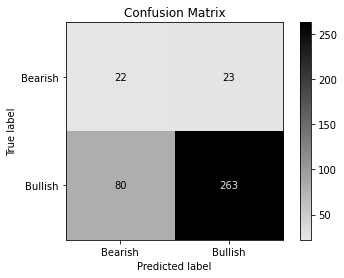

In [11]:
evaluator_finbert.show_confusion_matrix()

In [12]:
evaluator_finbert.show_bad_samples(num=10)

Actual Label: Bearish
Predicted Label: Bullish
Text: $XRP.X I just absolutely LOVE seeing the alt market have a bull run without you. This will be the case for a very, very long time.

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $AVAX.X $13 NexT stop

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X - Cardano simply can&#39;t match the engineering team behind Solana. \n \nSolana hired all those Qualcomm engineers, the best ones in the world.  Sorry, but Cardano is the wrong blockchain to invest in.

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $BNB.X garbage right down there with cardano

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $AVAX.X it&#39;s sad to see so many people marry this coin. Never marry an investment. Make good investment and trading decisions.

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $XRP.X  \n \nBack to mi

In [13]:
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
import importlib
class_name = importlib.import_module("sentiment_analysis_evaluator")
importlib.reload(class_name)
from scripts.sentiment_analysis_evaluator import Evaluator
model_name = "ElKulako/cryptobert"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels = 3)
filtered_data = data_organize.data[data_organize.data['entities.sentiment.basic'].notna()]

evaluator_cryptobert = Evaluator(model,tokenizer,data=filtered_data)
accuracy = evaluator_cryptobert.evaluate_model_crypto_bert()
print(f"Accuracy of cryptobert sentiment analysis on rows with non-NaN entities.sentiment.basic: {accuracy:.2f}")

FinBERT Sentiment Analysis: 100%|██████████| 388/388 [00:41<00:00,  9.38it/s]

Accuracy of cryptobert sentiment analysis on rows with non-NaN entities.sentiment.basic: 0.89


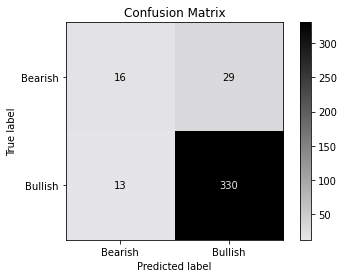

In [14]:
evaluator_cryptobert.show_confusion_matrix()

In [15]:
evaluator_cryptobert.show_bad_samples(num=10)

Actual Label: Bearish
Predicted Label: Bullish
Text: $DOGE.X pumpers back at it. Trying to steal retail money 😂😂

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $AVAX.X I have to admire the resistance but all resistance is futile.

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X    So rigged   All no name cryptos trending \n\nOk so those are more bought and desired ???  Wrong.  It’s manipulated. They hold the big ones back  $ETH.X $XRP.X

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $XRP.X I’m expecting most alts to run another 2-300% while XRP maintains its price under $1. Tons of other options on the market, but cults will be cults. \n$ETH.X $DOGE.X $SOL.X $TARA.X

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $BTC.X this whole ETF sideshow will be the largest DUMP AND SELL THE NEWS ever\nShitcoin carnage ahead with $ETH.X $DOGE.X $XRP.X etc\nWait till CZ and h